In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [2]:
from google.colab import files
uploaded = files.upload()

Saving VTI.csv to VTI (3).csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['VTI.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-12,149.309998,149.639999,148.789993,149.410004,143.666824,2181100
1,2018-09-13,149.970001,150.330002,149.750000,150.160004,144.387985,1905900
2,2018-09-14,150.279999,150.479996,149.789993,150.279999,144.503372,1363900
3,2018-09-17,150.240005,150.279999,149.190002,149.330002,143.589874,1661600
4,2018-09-18,149.429993,150.440002,149.399994,150.130005,144.359146,1665400


In [5]:
#setting index as date
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']

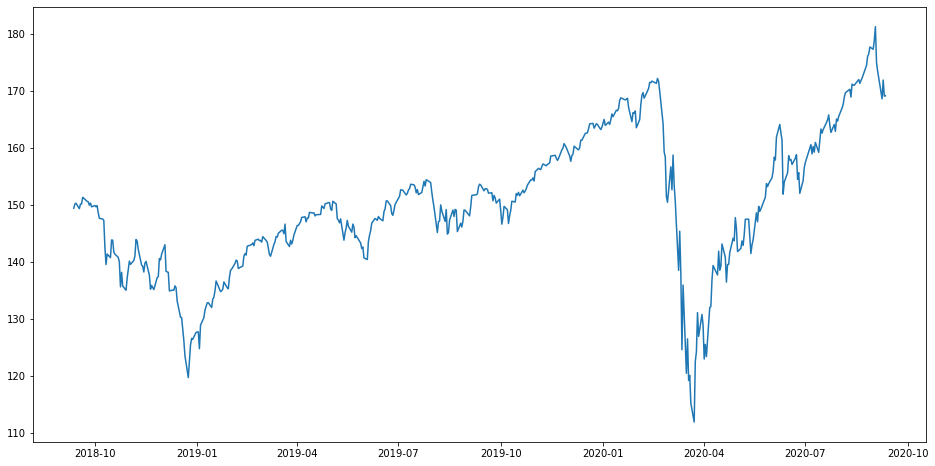

In [6]:
#plot
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')

In [7]:
# Creating a dataframe with date and target variable
df = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

In [8]:
for i in range(0,len(data)):
     new_data['Date'][i] = df['Date'][i]
     new_data['Close'][i] = df['Close'][i]

In [9]:
new_data.head()

,Date,Close
0,2018-09-12 00:00:00,149.41
1,2018-09-13 00:00:00,150.16
2,2018-09-14 00:00:00,150.28
3,2018-09-17 00:00:00,149.33
4,2018-09-18 00:00:00,150.13


In [10]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [11]:
new_data.head()

,Close
Date,
2018-09-12,149.41
2018-09-13,150.16
2018-09-14,150.28
2018-09-17,149.33
2018-09-18,150.13


In [12]:
#creating train and test sets
dataset = new_data.values

In [ ]:
dataset

In [14]:
# splitting into train and test
train = dataset[0:328,:]
test = dataset[328:,:]

In [ ]:
train

In [16]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
scaled_data

In [18]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train

In [21]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=30, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 30)            9720      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 30)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 80)            3

In [24]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
9/9 - 1s - loss: 0.1098 - accuracy: 0.0000e+00
Epoch 2/50
9/9 - 1s - loss: 0.0267 - accuracy: 0.0000e+00
Epoch 3/50
9/9 - 1s - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 4/50
9/9 - 1s - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 5/50
9/9 - 1s - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 6/50
9/9 - 1s - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 7/50
9/9 - 1s - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 8/50
9/9 - 1s - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 9/50
9/9 - 1s - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 10/50
9/9 - 1s - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 11/50
9/9 - 1s - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 12/50
9/9 - 1s - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 13/50
9/9 - 1s - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 14/50
9/9 - 1s - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 15/50
9/9 - 1s - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 16/50
9/9 - 1s - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 17/50
9/9 - 1s - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 

In [25]:
#predicting 176 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [26]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [ ]:
X_test

In [28]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [29]:
closing_price.shape

(176, 1)

In [30]:
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms

9.037934227961458

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


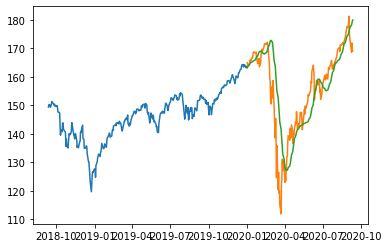

In [31]:
#for plotting
train = new_data[:328]
test = new_data[328:]
test['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']])
plt.show()